In [1]:
import pandas as pd
import numpy as np

# Working with missing data

In [2]:
None==None

True

In [3]:
np.nan == np.nan

False

In [5]:
s = pd.Series([np.nan,1,np.nan])
s == np.nan, s.isna()

(0    False
 1    False
 2    False
 dtype: bool,
 0     True
 1    False
 2     True
 dtype: bool)

__np.nan is a float__ and forces int array ot be float type

In [12]:
pd.Series([1,2, np.nan]).dtype, pd.Series([1,2]).dtype

(dtype('float64'), dtype('int64'))

use Int dtype

In [15]:
pd.Series([1,2,np.nan], dtype=pd.Int32Dtype()).dtype

Int32Dtype()

## Filling missing values

1. fill with scallar

In [18]:
s = pd.Series([np.nan, 1,2, pd.NaT])
s

0    NaN
1      1
2      2
3    NaT
dtype: object

In [19]:
s.fillna('missing')

0    missing
1          1
2          2
3    missing
dtype: object

2. Pad/ffill

In [29]:
s.fillna(method='pad'), s.fillna(method='ffill')

(0    NaN
 1    1.0
 2    2.0
 3    2.0
 dtype: float64,
 0    NaN
 1    1.0
 2    2.0
 3    2.0
 dtype: float64)

3. Bfill/backfill

In [30]:
s.fillna(method='bfill'), s.fillna(method='backfill'), s.bfill()

(0      1
 1      1
 2      2
 3    NaT
 dtype: object,
 0      1
 1      1
 2      2
 3    NaT
 dtype: object,
 0      1
 1      1
 2      2
 3    NaT
 dtype: object)

Limit number of filled value

In [32]:
s.fillna('missing', limit=1)

0    missing
1          1
2          2
3        NaT
dtype: object

## Drop axis based on missing values

In [37]:
df = pd.DataFrame({'a': [1 ,2, 3], 'b': [np.nan, 2,3]})
df

,a,b
0,1,NaN
1,2,2.0
2,3,3.0


In [41]:
df.dropna(axis=0)

,a,b
1,2,2.0
2,3,3.0


In [42]:
df.dropna(axis=1)

,a
0,1
1,2
2,3


In [47]:
df.b.dropna()

1    2.0
2    3.0
Name: b, dtype: float64

## Interpolation

In [49]:
ts = pd.Series([1,2,3,1,2,2, np.nan, np.nan, 4,3,2], index=pd.date_range('2020/1/1', '2020/1/11'))

In [53]:
ts.count()

9

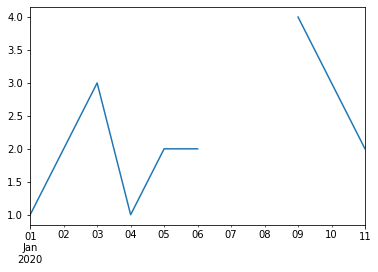

In [54]:
ts.plot()

In [55]:
ts.interpolate().count()

11

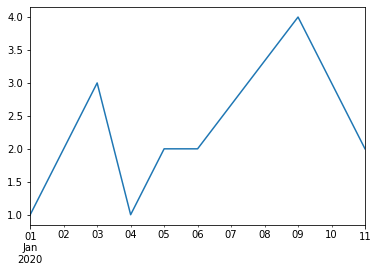

In [56]:
ts.interpolate().plot()

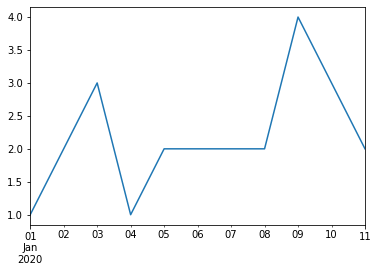

In [58]:
ts.interpolate(method='pad').plot()

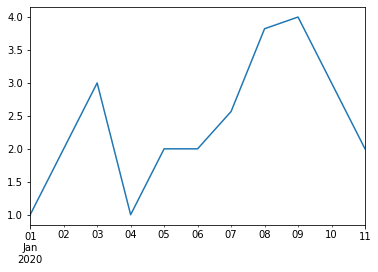

In [61]:
ts.interpolate(method='polynomial', order=2).plot()

## Replace

In [66]:
s.replace(np.nan, 'missing')

0    missing
1          1
2          2
3    missing
dtype: object

In [67]:
s.replace(1,'invalid')

0        NaN
1    invalid
2          2
3        NaT
dtype: object

In [69]:
s.replace({1:-1, 2: 'over bountries'})

0               NaN
1                -1
2    over bountries
3               NaT
dtype: object

# pd.NA 
was introduced to consistently indicate missing data across all types

In [74]:
pd.NA is pd.NA, pd.NA == pd.NA, np.nan == np.nan

(True, <NA>, False)

In [76]:
pd.NA * 1, pd.isna(pd.NA), pd.isnull(pd.NA)

(<NA>, True, True)